In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Principal Component Analysis

> "By eye, it is clear that there is a nearly linear relationship between the x and y variables. This is reminiscent of the linear regression data we explored in In Depth: Linear Regression, but the problem setting here is slightly different: rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values.

> In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset."

> – Jake VanderPlas

PCA is a spectral decomposition method which solves for the eigenvectors (principal components) of the covariance matrix:

$${\displaystyle \Sigma _{ij}=\mathrm {cov} (X_{i},X_{j})=\mathrm {E} {\begin{bmatrix}(X_{i}-\mu _{i})(X_{j}-\mu _{j})\end{bmatrix}}=\mathrm {E} {\begin{bmatrix}X_{i}X_{j}\end{bmatrix}}-\mu _{i}\mu _{j}}$$

The matrix $\mathbf{R}$, where each column is an eigenvector of the covariance matrix, with associated eigenvalues $\lambda$ satisfies the condition

$$\mathbf{\Sigma} \propto \mathbf{X}^T \mathbf{X} = \mathbf{R} \mathbf{\Lambda} \mathbf{R}^T$$

where $\mathbf{\Lambda}$ is the diagonal matrix form of the eigenvalues.

PCA is a linear transformation which we can use to change the data $\mathbf{X}$ into an orthogonal coordinate system $\mathbf{T}$. 

$$\mathbf{T} = \mathbf{X} \mathbf{R}$$

The variance of this projected data is maximized by the first axis (principal component), and so on in descending order.

* PCA is a way to spread data out on "natural" axes. 
* Clusters in PCA space can be easier to work with, in particular when classifying noisey data.
* Axes may be hard to interpret directly

# References

1. https://en.wikipedia.org/wiki/Principal_component_analysis
1. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

# Interactive Demos

1. http://setosa.io/ev/principal-component-analysis/
1. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


# Obligatory People's Faces

The following demo is borrowed from the great [write up](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) by [Jake VanderPlas](https://github.com/jakevdp). If you enjoyed this, you should check out his [book](http://shop.oreilly.com/product/0636920034919.do).

Image data can often be **very** large, and difficult to work with. A common approach to dealing with this, is to perform dimensionality reduction, to identify the principal features that dominate the structure of the image dataset. Below, this tutorial will guide you through performing PCA on the images of a few prominent politicians.

First, let's download the images from `sklearn`.

In [14]:
import warnings
from sklearn.datasets import fetch_lfw_people

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    faces = fetch_lfw_people(min_faces_per_person=60)
    
print("The following dataset has images of \n \t * " + " \n \t * ".join(faces.target_names) + ".")
print()
print("The full dataset has {:d} images with resolution {:d}x{:d}.".format(*faces.images.shape))

The following dataset has images of 
 	 * Ariel Sharon 
 	 * Colin Powell 
 	 * Donald Rumsfeld 
 	 * George W Bush 
 	 * Gerhard Schroeder 
 	 * Hugo Chavez 
 	 * Junichiro Koizumi 
 	 * Tony Blair.

The full dataset has 1348 images with resolution 62x47.


As the dimensionality of this image is so large, the solution to the eigenvectors can be computationally expensive. For that reason we'll perform a randomized PCA using the option `svd_solver='randomized'`.

In [1]:
from sklearn.decomposition import PCA

In [9]:
faces_pca = PCA(n_components=150, svd_solver='randomized').fit(faces.data)

We manually selected to only select 150 components that maximize the variance of our dataset. To evaluate whether this is enough, we look at the cumulative sum of the explained variance ratio. This shows us how much variance is explained by each component. 

Additionally, if we know *a priori* we want to capture a set percentage (say $95%$) of the variances, we could set `n_components=0.95`.

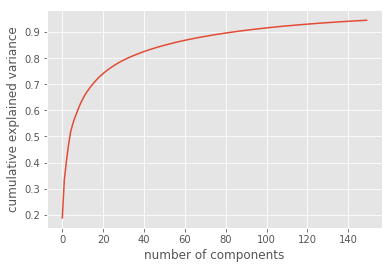

In [10]:
plt.plot(np.cumsum(faces_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Let's now transform our data, and immediately inverse that transformation. If the principal components truly capture the variance, this should result in images that look very close to our original images.

In [ ]:
components = faces_pca.transform(faces.data)
projected = faces_pca.inverse_transform(components)

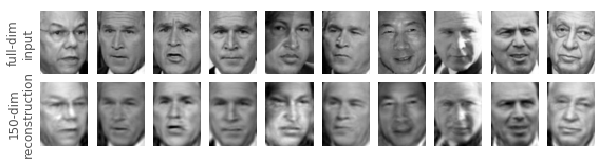

In [11]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');